# Лекция 9: Основные методы SciML

## Введение

На сегодняшний день научные вычисления сталкиваются с всё более сложными задачами, требующими не только высокой точности, но и эффективности вычислений. Моделирование физических процессов, решение дифференциальных уравнений и задачи оптимизации зачастую оказываются очень ресурсоёмкими для традиционных численных методов. Именно здесь на помощь приходит SciML (Scientific Machine Learning) – подход, объединяющий классические численные техники с методами машинного обучения для ускорения вычислений, повышения устойчивости моделей и внедрения априорных знаний о физических закономерностях. Примеры таких применений включают моделирование потоков жидкости, предсказание материаловедческих свойств и климатическое моделирование.

В основе SciML лежат базовые идеи машинного обучения, включая обучение с учителем и без учителя, а также использование нейронных сетей для решения сложных задач. Эти методы интегрируются с традиционными численными алгоритмами посредством автоматического дифференцирования, использования решателей дифференциальных уравнений и оптимизационных методов. Такой синтез позволяет не только улучшить точность численных решений, но и значительно ускорить процесс моделирования, что открывает новые возможности в научных исследованиях и инженерных приложениях.

Наибольшая эффективность в SciML достигается за счёт интеграции априорных физических знаний с современными техниками машинного обучения. 

В числе основных направлений можно выделить:
- **Physics-Informed Neural Networks (PINNs)** - модели интегрирующие дифференциальные уравнения в функцию потерь нейросети, что позволяет учить моедль описывать (аппроксимировать) решение физической задачи.  
- **Neural Ordinary Differential Equations (Neural ODEs):** - позволяет использовать нейронные сети для непрерывного моделирования динамических систем.  
- **Surrogate Modeling и Data Assimilation:** - идея построения суррогатных моделей - вычислительно эффктивных замен дорогостоящих симуляций -  и интеграция экспериментальных данных для корректировки параметров моделей, что позволяет значительно ускорить вычисления близких экспериментов при параметрических исследованиях.

## Основные методы SciML


### Physics-Informed Neural Networks, PINNs

Физически обоснованные нейронные сети (PINNs) представляют собой метод, в котором априорные физические законы, выраженные в виде дифференциальных уравнений, интегрируются в процесс обучения нейронной сети. Рассмотрим задачу нахождения неизвестной функции $ u(x,t) $, удовлетворяющей некоторому дифференциальному уравнению  

$$
\mathcal{N}[u(x,t)] = 0, \quad (x,t) \in \Omega,
$$

с набором граничных и/или начальных условий, например,  

$$
\mathcal{B}[u(x,t)] = 0, \quad (x,t) \in \partial\Omega.
$$

Для приближения решения вводится нейросетевая аппроксимация $ u_\theta(x,t) $, где $ \theta $ обозначает вектор параметров нейронной сети. Для оценки качества аппроксимации формулируется функция потерь, составленная из нескольких слагаемых. Основное слагаемое – функционал нарушения физического закона – вычисляется по формуле:

$$
L_{\text{res}}(\theta) = \frac{1}{N_{r}} \sum_{i=1}^{N_{r}} \left| \mathcal{N}\Big[ u_\theta(x_r^{(i)},t_r^{(i)}) \Big] \right|^2,
$$

где $ \{(x_r^{(i)},t_r^{(i)})\}_{i=1}^{N_{r}} $ – набор точек в области $\Omega$, в которых оценивается отклонение от выполнения уравнения.

Помимо этого, к функции потерь добавляют слагаемые, отвечающие за соблюдение граничных и начальных условий. Например, для граничных условий можно записать:

$$
L_{\text{bc}}(\theta) = \frac{1}{N_{b}} \sum_{j=1}^{N_{b}} \left| \mathcal{B}\Big[ u_\theta(x_b^{(j)},t_b^{(j)}) \Big] \right|^2,
$$

а для начальных условий:

$$
L_{\text{ic}}(\theta) = \frac{1}{N_{i}} \sum_{k=1}^{N_{i}} \left| u_\theta(x_i^{(k)},0) - u_0(x_i^{(k)}) \right|^2.
$$

Общая функция потерь имеет вид:

$$
L(\theta) = L_{\text{res}}(\theta) + L_{\text{bc}}(\theta) + L_{\text{ic}}(\theta),
$$

и задача обучения заключается в поиске оптимальных параметров $ \theta $ посредством решения задачи оптимизации:

$$
\min_{\theta} \, L(\theta).
$$

Таким образом, в процессе оптимизации нейронная сеть не только подбирает функцию, приближающую требуемое решение, но и обеспечивает соблюдение физических закономерностей, что позволяет применять априорные знания для повышения точности и устойчивости численного решения. Различные компоненты могут быть учтены с различными весами, которые могут быть настроены в процессе обучения или заданы на сновании некоторых требованиях к решению.

#### Пример

В задаче моделируется динамика колебаний механической системы, представляющей собой точечную массу, закреплённую на упругой пружине с демпфером. Объект смещён из положения равновесия и отпущен без придания начальной скорости, что позволяет наблюдать затухающие осцилляции, вызванные упругими и демпфирующими силами. Данная система моделирует типичный колебательный процесс без учёта гравитации.

**Параметры системы**:
  - Объект имеет массу $ m = 1.0 $ кг.
  - Пружина имеет коэффициент упругости $ k = 50.0 $ Н/м, она определяет силу, возвращающую объект в положение равновесия.
  - Демпфер имеет коэффициент сопротивления $ r = 2.0 $ Н·с/м, приводящее к затуханию колебаний.

**Начальные условия**:
  - Объект отведён из положения равновесия на $ x_0 = 2.0 $ м.
  - При отпускании объект не имеет начальной скорости ($ v_0 = 0.0 $ м/с).

**Временной интервал моделирования**:
  - Моделирование происходит в течение $ 10 $ секунд, что позволяет проследить затухание колебаний.

##### Математическая постановка задачи

Решаемое уравнение динамики колебаний системы является однородным линейным дифференциальным уравнением второго порядка с постоянными коэффициентами. Получим его аналитическое решение для последующего сравнения.

Исходное дифференциальное уравнение описывается формулой:

$$
m \, \ddot{x}(t) + r \, \dot{x}(t) + k \, x(t) = 0,
$$

где:
- $ m $ — масса системы [кг],
- $ r $ — коэффициент сопротивления (трения) [Н·с/м],
- $ k $ — коэффициент упругости [Н/м],
- $ x(t) $ — смещение системы в момент времени $ t $ [с],
- $ \dot{x}(t) $ и $ \ddot{x}(t) $ — первая и вторая производные $ x $ по времени соответственно ([м/с] и [м/с$^2$]).

Для удобства делим уравнение на $ m $:

$$
\ddot{x}(t) + \frac{r}{m} \, \dot{x}(t) + \frac{k}{m} \, x(t) = 0.
$$

Введем обозначения:
- Собственная частота: $\omega_0 = \sqrt{\frac{k}{m}}$,
- Коэффициент (декремент) затухания: $\gamma = \frac{r}{2m}$.

Тогда уравнение принимает вид:

$$
\ddot{x}(t) + 2\gamma \, \dot{x}(t) + \omega_0^2 \, x(t) = 0.
$$

Предположим, что решение имеет вид $ x(t) = e^{\lambda t} $. Подставляя это в уравнение, получаем характеристическое уравнение:

$$
\lambda^2 + 2\gamma \, \lambda + \omega_0^2 = 0.
$$

Решение квадратного уравнения даёт корни:

$$
\lambda_{1,2} = -\gamma \pm \sqrt{\gamma^2 - \omega_0^2}.
$$

В зависимости от соотношения $ \gamma^2 $ и $ \omega_0^2 $ выделяют три случая: апериодическое затухание, слабое затухание и пограничный случай.

Для определения режима подставим конкретные параметры системы и рассмотрим сравнение $ \gamma^2 $ и $ \omega_0^2 $:

$$
\gamma^2 = (\frac{r}{2m})^2 = 1.0^2 = 1.0,\quad \omega_0^2 = \frac{k}{m} = 50.0.
$$

Поскольку

$$
\gamma^2 < \omega_0^2,
$$

то в этом случае решение уравнения представляет собой затухающие осцилляции - случай слабого затухания.

Определим $ \omega_1 $ как частоту затухающих колебаний:

$$
\omega_1 = \sqrt{\omega_0^2 - \gamma^2}.
$$

Общий вид решения имеет вид:

$$
x(t) = e^{-\gamma t} \Big( A \cos(\omega_1 t) + B \sin(\omega_1 t) \Big).
$$

Определим константы $ A $ и $ B $ из начальных условий. Напомним, что начальные условия заданы как:

$$
x(0) = x_0, \quad \dot{x}(0) = v_0.
$$

Подставляя $ t = 0 $ в общее решение, получаем:

$$
x(0) = A = x_0.
$$

Для вычисления производной:

$$
\dot{x}(t) = -\gamma e^{-\gamma t} (A \cos(\omega_1 t) + B \sin(\omega_1 t)) + e^{-\gamma t} \Big( -A \omega_1 \sin(\omega_1 t) + B \omega_1 \cos(\omega_1 t) \Big).
$$

При $ t=0 $:

$$
\dot{x}(0) = -\gamma A + B \omega_1 = v_0.
$$

Отсюда находим:

$$
B = \frac{v_0 + \gamma x_0}{\omega_1}.
$$

Таким образом, окончательное решение имеет вид:

$$
x(t) = e^{-\gamma t} \left( x_0 \cos(\omega_1 t) + \frac{v_0 + \gamma x_0}{\omega_1} \sin(\omega_1 t) \right).
$$

In [1]:
import torch
import torch.nn as nn

import numpy as np

import onnx
import json

import netron

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import IFrame

In [2]:
class PINN(nn.Module):
    """
    Физически-информированная нейронная сеть (PINN) для моделирования динамики колебаний.

    Arguments
    ---------
    layers: nn.ModuleList
        Список линейных слоев нейронной сети.
    activation: callable
        Функция активации, используемая в скрытых слоях (Tanh).

    Methods
    -------
    forward: torch.tensor -> torch.tensor
        Прямой проход через сеть, возвращающий предсказанные значения для входных данных t.
    """
    def __init__(self, layers: list):
        super(PINN, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.layers.append(nn.Linear(layers[i], layers[i + 1]))
        self.activation = nn.Tanh()

    def forward(self, t: torch.Tensor) -> torch.Tensor:
        """
        Прямой проход через сеть.

        Parameters
        ----------
        t: torch.Tensor
            Входные данные (время), для которых необходимо получить предсказания.

        Returns
        -------
        x: torch.Tensor
            Предсказанные значения координат для входных значений t.
        """
        inputs = t
        for layer in self.layers[:-1]:
            inputs = self.activation(layer(inputs))
        x = self.layers[-1](inputs)
        
        return x

In [3]:
def loss_function(model: PINN,
                  t_f: torch.Tensor,
                  t_i: torch.Tensor) -> torch.Tensor:
    """
    Вычисляет функцию потерь для модели PINN по уравнению колебаний.

    Parameters
    ----------
    model: PINN
        Объект модели PINN.
    t_f: torch.Tensor
        Входные данные для вычисления потерь на основе уравнений движения.
    t_i: torch.Tensor
        Входные данные для начальных условий.

    Returns
    -------
    tuple: Кортеж, содержащий:
    - loss (torch.Tensor): Значение функции потерь.
    - (loss_x0, loss_v0, loss_f) (tuple): Значения потерь для начального смещения, начальной скорости и уравнения движения.
    """
    x_f = model(t_f)
    x_i = model(t_i)

    x_f_t = torch.autograd.grad(x_f, t_f, 
                                grad_outputs=torch.ones_like(x_f),
                                create_graph=True)[0]
    
    x_f_tt = torch.autograd.grad(x_f_t, t_f, 
                                 grad_outputs=torch.ones_like(x_f_t),
                                 create_graph=True)[0]

    x_i_t = torch.autograd.grad(x_i, t_i, 
                                grad_outputs=torch.ones_like(x_i),
                                create_graph=True)[0]
    
    global r, k, m, x_0, v_0
    
    f = x_f_tt + (r/m) * x_f_t + (k/m) * x_f

    loss_f = torch.mean(torch.squeeze(f)**2)
    loss_x0 = torch.mean((torch.squeeze(x_i) - x_0)**2)
    loss_v0 = torch.mean((torch.squeeze(x_i_t) - v_0)**2)

    lambda0, lambda1, lambda2 = 1, 1e-1, 1e-3
    loss = lambda0 * loss_x0 + lambda1 * loss_v0 + lambda2 * loss_f
    
    return loss, (loss_x0.item(), 
                  loss_v0.item(), 
                  loss_f.item())

In [4]:
m = 1.0 # [кг]
k = 50.0 # [Н/м]
r = 2.0 # [Н·с/м]
x_0 = 2.0 # [м]
v_0 = 0.0 # [м/c]

T = 10.0 # [с]

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
layers = [1, 32, 32, 32, 32, 1]

model = PINN(layers).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=4e-3)

In [7]:
N_f = 1000

t_f = torch.linspace(0, T, N_f, device=device).view(-1, 1).requires_grad_(True)
t_i = torch.tensor(0., device=device).view(-1, 1).requires_grad_(True)

In [ ]:
num_epochs = 20000

for epoch in range(num_epochs+1):
    optimizer.zero_grad()
    
    loss, losses = loss_function(model, t_f, t_i)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print(f'Epoch {epoch},',
              f'Losses: x_i = {round(losses[0], 4)},', 
              f'v_i = {round(losses[1], 4)},', 
              f'f = {round(losses[2], 4)}')

In [ ]:
def analytical_solution(t: np.ndarray) -> np.ndarray:
    """"
    Вычисляет аналитическое решение уравнения колебаний по уравнению:
    x(t) = a * e^(-beta * t) * cos(omega_d * t) + b * e^(-beta * t) * sin(omega_d * t) 

    Parameters
    ----------
    t: np.ndarray
        Время, для которого необходимо вычислить решение.

    Returns
    -------
    x: np.ndarray
        Значения смещения x(t) в зависимости от времени t.
    """
    global r, k, m, x_0, v_0

    beta = r / (2 * m)
    omega0 = np.sqrt(k / m)
    omega_d = np.sqrt(omega0**2 - beta**2)
    a = x_0
    b = (v_0 + beta * x_0) / omega_d
    
    x = (a * np.exp(-beta * t) * np.cos(omega_d * t)
         + b  * np.exp(-beta * t) * np.sin(omega_d * t))
    
    return x

In [ ]:
def visualize_model_solution(model: PINN, 
                             T: float, 
                             points: int=200) -> None:
    """
    Визуализирует решение модели и аналитическое решение уравнения колебаний.

    Parameters
    ----------
    model: PINN
        Объект модели PINN, который будет использоваться для предсказания значений.
    T: float
        Общее время моделирования, до которого будут генерироваться временные точки.
    points: int
        Количество точек, которые будут использованы для визуализации (по умолчанию 200).
    """
    t_plot = torch.linspace(0, T, points, 
                            device=device).unsqueeze(1)
    with torch.no_grad():
        x_plot = model(t_plot)
    
    t_np = t_plot.cpu().numpy().flatten()
    x_np = x_plot.cpu().numpy().flatten()

    x_analytical = analytical_solution(t_np)
    
    plt.plot(t_np, x_np, 'b-', label='x(t) (PINN)')
    plt.plot(t_np, x_analytical, 'r-', label='x(t) (Analytical)')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.grid(True)
    plt.show()

In [ ]:
visualize_model_solution(model, T)

In [12]:
model.double()

x = torch.randn(1, 1, device=device, dtype=torch.float64) * T

input_names = ['t']
output_names = ['x']

torch.onnx.export(model,
                  (x),
                  "OscillatorModel.onnx",
                  opset_version=12,
                  input_names=input_names,
                  output_names=output_names)

In [ ]:
onnx_model_path = "OscillatorModel.onnx"

url = netron.start(onnx_model_path, browse=False)
IFrame(src=f"http://localhost:8080/", width=600, height=600)

In [ ]:
netron.stop()

### Surrogate Modeling

Пусть имеется дорогостоящий вычислительный симулятор, который задаёт зависимость

$$
y = f(\mathbf{x}),
$$

где $ \mathbf{x} \in \mathcal{D} \subset \mathbb{R}^d $ – вектор параметров (например, геометрические размеры, физические параметры), а $ y \in \mathbb{R} $ – выход (например, температура, тепловой поток). При этом вычисление $ f(\mathbf{x}) $ может быть весьма затратным по ресурсам.

Суррогатная модель $ \hat{f}(\mathbf{x}) $ представляет собой приближение исходного симулятора, построенное на основе конечного числа экспериментальных или симуляционных данных

$$
\{ (\mathbf{x}_i, y_i) \}_{i=1}^{N}, \quad y_i = f(\mathbf{x}_i) + \varepsilon_i,
$$

где $\varepsilon_i$ может учитываться как шум измерений.

Одной из распространённых методов является регрессионный подход: решается задача минимизации ошибки аппроксимации по обучающей выборке. В общем случае целевая функция имеет вид:

$$
\min_{\hat{f} \in \mathcal{H}} \sum_{i=1}^{N} \left| y_i - \hat{f}(\mathbf{x}_i) \right|^2,
$$

где $ \mathcal{H} $ – выбранное семейство функций (например, полиномиальные модели, гауссовские процессы или модели, построенные методом опорных векторов).

Это равносильно простому обучению с учителем задаче регрессии.

#### Гауссовские процессы

В случае использования гауссовского процесса (GP) предполагается, что функция $ f(\mathbf{x}) $ является выборкой из стохастического процесса:
$$
f(\mathbf{x}) \sim \mathcal{GP}\left(m(\mathbf{x}), k(\mathbf{x},\mathbf{x}')\right),
$$
где $ m(\mathbf{x}) $ – функция среднего значения (обычно берется равной нулю: $ m(\mathbf{x}) = 0 $), а $ k(\mathbf{x},\mathbf{x}') $ – ядровая функция (например, радиальное базисное ядро, $ k(\mathbf{x},\mathbf{x}') = \sigma_f^2 \exp\left(-\frac{\|\mathbf{x} - \mathbf{x}'\|^2}{2l^2}\right) $).

Построение GP-модели включает оценку гиперпараметров $\sigma_f$ и $l$ посредством максимизации логарифмического правдоподобия. Затем для нового входа $ \mathbf{x}_*$ можно получить апостериорное распределение предсказания $ f_* = f(\mathbf{x}_*) $ с математическим ожиданием:
$$
\mu_* = \mathbf{k}_*^T (\mathbf{K} + \sigma_n^2 \mathbf{I})^{-1} \mathbf{y},
$$
и дисперсией
$$
\sigma^2_* = k(\mathbf{x}_*, \mathbf{x}_*) - \mathbf{k}_*^T (\mathbf{K} + \sigma_n^2 \mathbf{I})^{-1}\mathbf{k}_*,
$$
где $\mathbf{K}$ – ковариационная матрица обучающих точек, $\mathbf{k}_*$ – вектор ядерных функций между $ \mathbf{x}_* $ и обучающими точками, $\sigma_n^2$ – дисперсия шума, а $\mathbf{y}$ – вектор наблюдений.

#### Пример

Набор данных для задачи суррогатного моделирования с реальными измерениями, – это Airfoil Self-Noise Data Set с UCI Machine Learning Repository. 

Этот набор содержит результаты экспериментов по измерению уровня шума обтекаемого воздушного профиля (аэродинамический шум), что соответствует инженерной задаче, где результаты экспериментов (или дорогостоящие CFD-симуляции) заменяются более лёгкой моделью.

Краткое описание набора данных Airfoil Self-Noise
Входные переменные:
- Частота (frequency, Hz)
- Угол атаки (angle of attack, °)
- Хордовая длина (chord length, m)
- Скорость свободного потока (free-stream velocity, m/s)
- Толщина пограничного слоя на стороне всасывания (suction side displacement thickness, m)

Целевая переменная:
- Масштабированный уровень шума (scaled sound pressure level, dB)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"

cols = ["Frequency", "Angle_of_Attack", "Chord_Length", "Free_Stream_Velocity", "Suction_Displacement_Thickness", "Sound_Pressure_Level"]
data = pd.read_csv(url, sep="\t", header=None, names=cols, engine='python')
data.head()

In [ ]:
X = data.iloc[:, :-1].values
y = data["Sound_Pressure_Level"].values

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)

gp.fit(X_train, y_train)

In [ ]:
y_pred, sigma = gp.predict(X_test, return_std=True)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

### Neural Ordinary Differential Equations, Neural ODEs

В классических динамических системах эволюция состояния $ \mathbf{x}(t) $ описывается дифференциальным уравнением  
$$
\frac{d\mathbf{x}(t)}{dt} = f(\mathbf{x}(t), t),
$$
где $ f $ — функция, задающая прирост состояния, а решение находится посредством численного интегрирования (например, методами Рунге–Кутты).

При использовании концепции Neural ODEs функция $ f $ апроксимируется нейросетью с параметрами $ \theta $:  
$$
\frac{d\mathbf{x}(t)}{dt} = f_\theta(\mathbf{x}(t), t).
$$
Решение данной задачи можно записать в интегральной форме с начальным условием $ \mathbf{x}(t_0) = \mathbf{x}_0 $:
$$
\mathbf{x}(t_1) = \mathbf{x}_0 + \int_{t_0}^{t_1} f_\theta(\mathbf{x}(t), t)\, dt.
$$
Здесь численный интегратор (например, функция odeint) используется для получения $ \mathbf{x}(t_1) $. В рамках обучения параметры $ \theta $ оптимизируются таким образом, чтобы выход интегрированного решения $ \mathbf{x}_\theta(t) $ соответствовал наблюдаемым данным $ \hat{\mathbf{x}}(t) $. Целевая функция оптимизации может иметь вид:
$$
\min_\theta \; \mathcal{L} = \sum_{i=1}^{N} \left\| \mathbf{x}_\theta(t_i) - \hat{\mathbf{x}}(t_i) \right\|^2,
$$
где сумма берется по временным точкам. Так, Neural ODEs представляют непрерывное представление трансформаций, моделируя динамику системы через обучаемую производную. Это позволяет интегрировать априорные знания (например, физические законы) в структуру модели и использовать эффективные решатели численных ОДУ.

#### Пример

[Более сложный пример](https://medium.com/data-science/neural-odes-with-pytorch-lightning-and-torchdyn-87ca4a7c6ffd)

In [36]:
!pip install torchdiffeq -q

In [15]:
import torch
import torch.nn as nn
import torch.utils.data as data
import pytorch_lightning as pl

import numpy as np
import matplotlib.pyplot as plt

from torchdyn.core import NeuralODE
from torchdyn.datasets import ToyDataset
from torchdyn import *

from sklearn.metrics import accuracy_score

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
d = ToyDataset()
X, yn = d.generate(n_samples=512, noise=1e-1, dataset_type='moons')

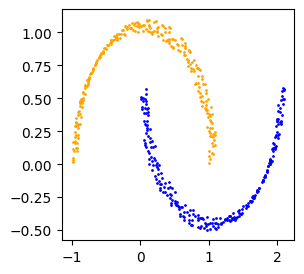

In [5]:
colors = ['orange', 'blue']
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
for i in range(len(X)):
    ax.scatter(X[i,0], X[i,1], s=1, color=colors[yn[i].int()])

In [6]:
X_train = torch.Tensor(X).to(device)
y_train = torch.LongTensor(yn.long()).to(device)
train = data.TensorDataset(X_train, y_train)
trainloader = data.DataLoader(train, batch_size=len(X), shuffle=True)

In [7]:
t_span = torch.linspace(0,1,100)

In [8]:
class Learner(pl.LightningModule):
    def __init__(self, t_span:torch.Tensor, model:nn.Module):
        super().__init__()
        self.model, self.t_span = model, t_span

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        t_eval, y_hat = self.model(x, t_span)
        y_hat = y_hat[-1] # select last point of solution trajectory
        loss = nn.CrossEntropyLoss()(y_hat, y)
        return {'loss': loss}

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=0.01)

    def train_dataloader(self):
        return trainloader

In [9]:
f = nn.Sequential(
        nn.Linear(2, 16),
        nn.Tanh(),
        nn.Linear(16, 2)
    )

model = NeuralODE(f, sensitivity='adjoint', solver='rk4', 
                  solver_adjoint='dopri5', atol_adjoint=1e-4, 
                  rtol_adjoint=1e-4).to(device)

t_eval, trajectory = model(X_train, t_span)
trajectory = trajectory.detach().cpu()

Your vector field callable (nn.Module) should have both time `t` and state `x` as arguments, we've wrapped it for you.


In [10]:
learn = Learner(t_span, model)
trainer = pl.Trainer(min_epochs=200, max_epochs=300)
trainer.fit(learn)

You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type      | Params | Mode 
--------------------------------------------
0 | model | NeuralODE | 82     | train
--------------------------------------------
82        Trainable params
0         Non-trainable params
82        Total params
0.000     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\ProgramData\miniconda3\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:310: The

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=300` reached.


In [11]:
t_eval, trajectory = model(X_train, t_span)
trajectory = trajectory.detach().cpu()

Text(0.5, 1.0, 'Dimension 1')

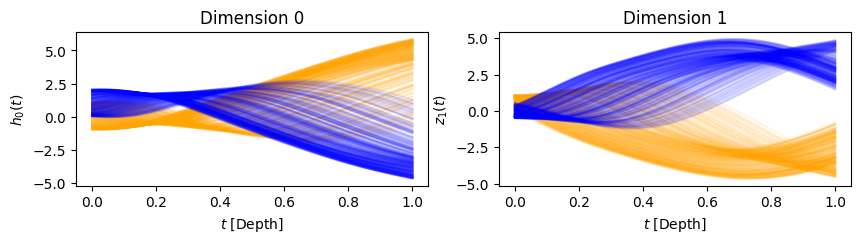

In [12]:
color=['orange', 'blue']

fig = plt.figure(figsize=(10,2))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
for i in range(500):
    ax0.plot(t_span, trajectory[:,i,0], color=color[int(yn[i])], alpha=.1);
    ax1.plot(t_span, trajectory[:,i,1], color=color[int(yn[i])], alpha=.1);
ax0.set_xlabel(r"$t$ [Depth]") ; ax0.set_ylabel(r"$h_0(t)$")
ax1.set_xlabel(r"$t$ [Depth]") ; ax1.set_ylabel(r"$z_1(t)$")
ax0.set_title("Dimension 0") ; ax1.set_title("Dimension 1")

c:\ProgramData\miniconda3\Lib\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


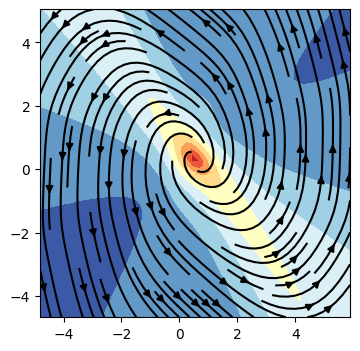

In [13]:
n_pts = 50
x = torch.linspace(trajectory[:,:,0].min(), 
                   trajectory[:,:,0].max(), n_pts)
y = torch.linspace(trajectory[:,:,1].min(), 
                   trajectory[:,:,1].max(), n_pts)

X, Y = torch.meshgrid(x, y)
z = torch.cat([X.reshape(-1,1), Y.reshape(-1,1)], 1)

f = model.vf(0,z.to(device)).cpu().detach()
fx, fy = f[:,0], f[:,1] ; fx, fy = fx.reshape(n_pts , n_pts), fy.reshape(n_pts, n_pts)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)

ax.streamplot(X.numpy().T, Y.numpy().T, fx.numpy().T, fy.numpy().T, 
              color='black')

ax.contourf(X.T, Y.T, torch.sqrt(fx.T**2+fy.T**2), cmap='RdYlBu')

In [16]:
model.eval()
t_predict = torch.tensor([0.0, 1.0]).to(device)

with torch.no_grad():
    _, trajectory_predict = model(X_train, t_predict)

final_states = trajectory_predict[-1]

predicted_classes = torch.argmax(final_states, dim=1)

predicted_classes_np = predicted_classes.cpu().numpy()
true_classes_np = y_train.cpu().numpy()

print(accuracy_score(true_classes_np, predicted_classes_np))

0.7265625


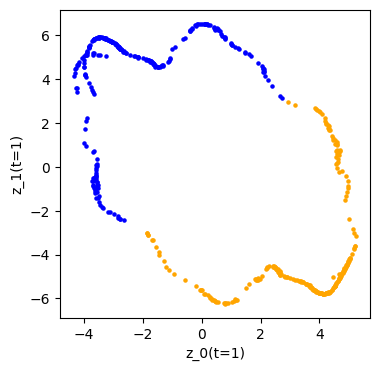

In [17]:
fig_final = plt.figure(figsize=(4,4))
ax_final = fig_final.add_subplot(111)
final_states_np = final_states.cpu().numpy()

for i in range(len(final_states_np)):
    ax_final.scatter(final_states_np[i, 0], final_states_np[i, 1], s=5, 
                     color=colors[predicted_classes_np[i]])

ax_final.set_xlabel("z_0(t=1)")
ax_final.set_ylabel("z_1(t=1)")
plt.show()

### Data Assimilation и Inverse Problems (Анализ данных и обратные задачи)

**Data Assimilation** – это процесс корректировки или обновления численных моделей на основе экспериментальных или наблюдательных данных. Главная идея состоит в том, что результаты модели можно улучшить, интегрируя с ней реальные наблюдения. При этом можно получить более точные предсказания, а также оценить неопределённость модели.

В общих чертах задача data assimilation сводится к нахождению таких параметров $\mathbf{p}$ или состояния системы $\mathbf{x}$, при которых численный прогноз $M(\mathbf{p})$ как можно лучше соответствует наблюдаемым данным $\mathbf{y}_{obs}$. Формально можно записать задачу в виде минимизации функционала ошибок:

$$
J(\mathbf{p}) = \frac{1}{2} \sum_{i=1}^{N} \left\| M(\mathbf{p};t_i) - y_{obs}(t_i) \right\|^2,
$$

где $M(\mathbf{p};t_i)$ – предсказание модели в момент времени $t_i$ для параметров $\mathbf{p}$. Если учесть априорное распределение параметров, можно использовать байесовскую постановку, где ищется максимальное апостериорное распределение (MAP оценка):

$$
\mathbf{p}^{*} = \arg\max_{\mathbf{p}} \; P(\mathbf{p}|\mathbf{y}_{obs}) \propto P(\mathbf{y}_{obs}|\mathbf{p}) P(\mathbf{p}),
$$

а функция правдоподобия $P(\mathbf{y}_{obs}|\mathbf{p})$ может быть записана через гауссовскую ошибку измерений.

**Обратные задачи** (inverse problems) предполагают восстановление параметров модели, используя наблюдаемые выходы. В этой постановке дано $y_{obs}$ и требуется найти $\mathbf{p}$ такое, что

$$
M(\mathbf{p}) \approx y_{obs}.
$$

Классический метод – минимизация функции ошибки (например, методом градиентного спуска). Возможны также байесовские методы, которые оценивают полное апостериорное распределение параметров и дают информацию об их неопределенности (например, с помощью методов Монте-Карло).

## Современные библиотеки для SciML

### Библиотеки на Python

- **DeepXDE** - фреймворк для реализации PINNs и решения дифференциальных уравнений с физическими ограничениями.
- **SimNet (от NVIDIA)** - платформа, ориентированная на моделирование физических систем с использованием нейронных сетей, предоставляющая широкий набор инструментов для интеграции физических законов в процесс обучения.
- **JAX** - JAX позволяет использовать автоматическое дифференцирование для научных вычислений, а Diffrax предоставляет решатели дифференциальных уравнений, интегрированные с JAX.

[Пример](https://colab.research.google.com/github/janblechschmidt/PDEsByNNs/blob/main/PINN_Solver.ipynb#scrollTo=S8PNryTZZEks)

[Пример](https://colab.research.google.com/drive/1L1EmfOFFnoXfCF8YwNxkCflEV0gAScqx?usp=sharing)

### Библиотеки на [Julia](https://github.com/sciml)

- **DifferentialEquations.jl** - один из самых мощных пакетов для решения различных типов дифференциальных уравнений.
- **ModelingToolkit.jl** - позволяет автоматически генерировать модели для символьного дифференцирования и упрощения систем уравнений.
- **Flux.jl** - фреймворк для создания нейронных сетей, интегрируемый с математическими решателями.
- **NeuralPDE.jl** - специализированная библиотека для реализации PINNs и решения дифференциальных уравнений с использованием нейронных сетей.

[Больше примеров](https://github.com/SciML/SciMLTutorials.jl)

#### Пример DeepXDE

In [ ]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
geom = dde.geometry.Interval(0, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [60]:
def heat_eq(x, u):
    du_t = dde.grad.jacobian(u, x, i=0, j=1) # du/dt
    du_xx = dde.grad.hessian(u, x, i=0, j=0) # du/dx
    return du_t - 0.1 * du_xx  # α = 0.1

In [ ]:
bc = dde.icbc.DirichletBC(geomtime, 
                          lambda x: 0, lambda _, on_boundary: on_boundary)

ic = dde.icbc.IC(
    geomtime,
    lambda x: np.sin(np.pi * x[:, 0:1]),
    lambda _, on_initial: on_initial,
)

net = dde.nn.FNN([2, 20, 20, 1], "tanh", "Glorot normal")
data = dde.data.TimePDE(geomtime, heat_eq, [bc, ic], 
                        num_domain=1000, 
                        num_boundary=100, 
                        num_initial=100, 
                        num_test=1000)
model = dde.Model(data, net)

In [ ]:
model.compile("adam", lr=1e-3)
losshistory, train_state = model.train(epochs=10000)

In [ ]:
x = np.linspace(0, 1, 101)
t = np.linspace(0, 2, 101)
X, T = np.meshgrid(x, t)
XT = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))

u_pred = model.predict(XT)
u_pred = u_pred.reshape(X.shape)

u_exact = np.sin(np.pi * X) * np.exp(-0.1 * (np.pi**2) * T)

error = np.abs(u_exact - u_pred)

fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(1, 3, 1)
contour1 = ax1.contourf(X, T, u_pred, 100, cmap="viridis")
ax1.set_title("Предсказанное решение PINN")
ax1.set_xlabel("x")
ax1.set_ylabel("t")
fig.colorbar(contour1, ax=ax1)

ax2 = fig.add_subplot(1, 3, 2)
contour2 = ax2.contourf(X, T, u_exact, 100, cmap="viridis")
ax2.set_title("Аналитическое решение")
ax2.set_xlabel("x")
ax2.set_ylabel("t")
fig.colorbar(contour2, ax=ax2)

ax3 = fig.add_subplot(1, 3, 3)
contour3 = ax3.contourf(X, T, error, 100, cmap="hot")
ax3.set_title("Абсолютная ошибка |u_exact - u_pred|")
ax3.set_xlabel("x")
ax3.set_ylabel("t")
fig.colorbar(contour3, ax=ax3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()